In [1]:
options(pkgType = "binary", repos = "https://cran-archive.r-project.org/")

In [2]:
# install.packages("devtools")  # if you don't have this installed yet.
# devtools::install_github('susanathey/causalTree') 
library(causalTree)

Installing package into 'C:/Users/user/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
also installing the dependencies 'credentials', 'openssl', 'gitcreds', 'ini', 'fastmap', 'gert', 'gh', 'whisker', 'cachem', 'xopen', 'brew', 'commonmark', 'usethis', 'memoise', 'pkgbuild', 'rcmdcheck', 'remotes', 'roxygen2', 'rversions', 'sessioninfo'



package 'credentials' successfully unpacked and MD5 sums checked
package 'openssl' successfully unpacked and MD5 sums checked
package 'gitcreds' successfully unpacked and MD5 sums checked
package 'ini' successfully unpacked and MD5 sums checked
package 'fastmap' successfully unpacked and MD5 sums checked
package 'gert' successfully unpacked and MD5 sums checked
package 'gh' successfully unpacked and MD5 sums checked
package 'whisker' successfully unpacked and MD5 sums checked
package 'cachem' successfully unpacked and MD5 sums checked
package 'xopen' successfully unpacked and MD5 sums checked
package 'brew' successfully unpacked and MD5 sums checked
package 'commonmark' successfully unpacked and MD5 sums checked
package 'usethis' successfully unpacked and MD5 sums checked
package 'memoise' successfully unpacked and MD5 sums checked
package 'pkgbuild' successfully unpacked and MD5 sums checked
package 'rcmdcheck' successfully unpacked and MD5 sums checked
package 'remotes' successfully 


Please download and install Rtools 3.5 from https://cran.r-project.org/bin/windows/Rtools/.

Please download and install Rtools 3.5 from https://cran.r-project.org/bin/windows/Rtools/.


ERROR: Error: Failed to install 'causalTree' from GitHub:
  Could not find tools necessary to compile a package
Call `pkgbuild::check_build_tools(debug = TRUE)` to diagnose the problem.


In [17]:
#install.packages("grf")
#install.packages("rpart")
#install.packages("glmnet")
#install.packages("splines")
#install.packages("MASS")
#install.packages("lmtest")
#install.packages("sandwich")
#install.packages("ggplot2")
#install.packages("dplyr")

library(grf)
library(rpart)
library(glmnet)
library(splines)
library(MASS)
library(lmtest)
library(sandwich)
library(ggplot2)
library(dplyr)

Installing package into 'C:/Users/user/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'dplyr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'dplyr'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\user\Documents\R\win-library\3.6\00LOCK\dplyr\libs\x64\dplyr.dll  a C:\Users\user\Documents\R\win-library\3.6\dplyr\libs\x64\dplyr.dll: Permission denied"Warning message:
"restored 'dplyr'"


The downloaded binary packages are in
	C:\Users\user\AppData\Local\Temp\RtmpMTWV0J\downloaded_packages


Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following object is masked from 'package:MASS':

    select

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [15]:
data=read.csv("C:/Users/user/Documents/GitHub/Causal-Inference-Proyect-e---STI/DATA/processed_esti.csv")
head(data)
n <- nrow(data)

# Treatment: does the the gov't spend too much on "welfare" (1) or "assistance to the poor" (0)
treatment <- "w"

# Outcome: 1 for 'yes', 0 for 'no'
outcome <- "y"

# Additional covariates
covariates <- colnames(data)[-c(1:2)]

y,w,gender_female,gender_male,gender_transgender,ethnicgrp_asian,ethnicgrp_black,ethnicgrp_mixed_multiple,ethnicgrp_other,ethnicgrp_white,partners1,postlaunch,msm,age,imd_decile
1,1,0,1,0,0,0,1,0,0,0,1,0,27,5
0,0,0,1,0,0,0,0,0,1,0,0,0,19,6
0,1,0,1,0,0,1,0,0,0,0,1,0,26,4
0,0,1,0,0,0,0,0,0,1,1,0,0,20,2
1,1,1,0,0,1,0,0,0,0,0,1,0,24,3
1,1,0,1,0,0,0,0,0,1,0,1,0,24,2


# OLS

## Group=Age

In [44]:
group1 <- 'age_group'

data <- data %>%
  mutate(age_group = ifelse(age %in% 16:19, "age_16-19", 
                            ifelse(age %in% 20:24, "age_20-24", "age_25-30")))

# Linear regression.
fmla <- formula(paste(outcome, ' ~ ', treatment, '*', 'factor(', group1, ')'))
ols <- lm(fmla, data=data)
ols.res <- coeftest(ols, vcov=vcovHC(ols, type='HC2'))

# Retrieve the interaction coefficients
interact <- which(sapply(names(coef(ols)), function(x) grepl("w:", x)))

# Retrieve unadjusted p-values and
unadj.p.value <- ols.res[interact, 4]
adj.p.value <- p.adjust(unadj.p.value, method='bonferroni')

data.frame(estimate=coef(ols)[interact], std.err=ols.res[interact,2], unadj.p.value, adj.p.value)

y ~ w * factor(age_group)


,estimate,std.err,unadj.p.value,adj.p.value
w:factor(age_group)age_20-24,0.04351246,0.05733158,0.447978760,0.895957519
w:factor(age_group)age_25-30,0.16857652,0.05892980,0.004278644,0.008557289


In [22]:
# Linear regression.
fmla <- formula(paste(outcome, ' ~ ', treatment, '*', 'age'))
ols <- lm(fmla, data=data)
ols.res <- coeftest(ols, vcov=vcovHC(ols, type='HC2'))

# Retrieve the interaction coefficients
interact <- which(sapply(names(coef(ols)), function(x) grepl("w:", x)))

# Retrieve unadjusted p-values and
unadj.p.value <- ols.res[interact, 4]
adj.p.value <- p.adjust(unadj.p.value, method='bonferroni')

data.frame(estimate=coef(ols)[interact], std.err=ols.res[interact,2], unadj.p.value, adj.p.value)

,estimate,std.err,unadj.p.value,adj.p.value
w:age,0.01727969,0.005963226,0.003806166,0.003806166


## Group=Gender

In [80]:
data1=data %>%
    filter(gender_transgender != 1)

In [81]:
# Linear regression.
fmla <- formula(paste(outcome, ' ~ ', treatment, '*', 'gender_male'))
ols <- lm(fmla, data=data1)
ols.res <- coeftest(ols, vcov=vcovHC(ols, type='HC2'))

# Retrieve the interaction coefficients
interact <- which(sapply(names(coef(ols)), function(x) grepl("w:", x)))

# Retrieve unadjusted p-values and
unadj.p.value <- ols.res[interact, 4]
adj.p.value <- p.adjust(unadj.p.value, method='bonferroni')

data.frame(estimate=coef(ols)[interact], std.err=ols.res[interact,2], unadj.p.value, adj.p.value)

,estimate,std.err,unadj.p.value,adj.p.value
w:gender_male,-0.1522287,0.04403134,0.0005588516,0.0005588516


## Group=ethnic

In [82]:
data2=data %>%
    filter(ethnicgrp_other != 1)

In [83]:
# Linear regression.
ethnic=c('ethnicgrp_asian','ethnicgrp_black','ethnicgrp_mixed_multiple','ethnicgrp_white')
interactions <- paste(treatment, "*", ethnic, collapse = " + ")
fmla <- formula(paste(outcome, "~", interactions))
ols <- lm(fmla, data=data2)
ols.res <- coeftest(ols, vcov=vcovHC(ols, type='HC2'))
# Retrieve the interaction coefficients
interact <- c('w:ethnicgrp_asian','w:ethnicgrp_black','w:ethnicgrp_mixed_multiple')
                         
# Retrieve unadjusted p-values and
unadj.p.value <- ols.res[interact, 4]
adj.p.value <- p.adjust(unadj.p.value, method='bonferroni')

data.frame(estimate=coef(ols)[interact[-4]], std.err=ols.res[interact[-4],2], unadj.p.value, adj.p.value)

,estimate,std.err,unadj.p.value,adj.p.value
w:ethnicgrp_asian,-0.14228470,0.08816894,0.10676126,0.3202838
w:ethnicgrp_black,-0.07028591,0.07509534,0.34942828,1.0000000
w:ethnicgrp_mixed_multiple,-0.14198413,0.07547174,0.06010261,0.1803078


# GRF

In [84]:
# Linear regression.
fmla <- formula(paste(outcome, ' ~ ', treatment, '*', 'ethnicgrp_white'))
ols <- lm(fmla, data=data)
ols.res <- coeftest(ols, vcov=vcovHC(ols, type='HC2'))

# Retrieve the interaction coefficients
interact <- which(sapply(names(coef(ols)), function(x) grepl("w:", x)))

# Retrieve unadjusted p-values and
unadj.p.value <- ols.res[interact, 4]
adj.p.value <- p.adjust(unadj.p.value, method='bonferroni')

data.frame(estimate=coef(ols)[interact], std.err=ols.res[interact,2], unadj.p.value, adj.p.value)

,estimate,std.err,unadj.p.value,adj.p.value
w:ethnicgrp_white,0.1055596,0.04892209,0.03108737,0.03108737


In [87]:
fmla <- formula(paste0("~ 0 +", paste0(covariates, collapse="+")))
XX <- model.matrix(fmla, data)
W <- data[,treatment]
Y <- data[,outcome]

# Comment or uncomment as appropriate.
# Randomized setting with known and fixed probabilities (here: 0.5).

forest.tau <- causal_forest(XX, Y, W, W.hat=.5) 

   [1] 1 0 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 1 0 0
  [38] 0 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0 0 1 1 1 0 0 1 1 1 0 0 1 0 0 1 1 1 1
  [75] 1 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 0 1 1 0 0 0 1 1 0 0 0 1
 [112] 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1
 [149] 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0
 [186] 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 0
 [223] 1 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0 1 0 1
 [260] 1 0 0 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 0 1 0 0
 [297] 1 1 0 1 1 0 1 0 1 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 1 0
 [334] 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0
 [371] 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 1 0 1 0 0 1 1
 [408] 0 1 0 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 1
 [445] 1 1 0 0 1 0 0 1 1 1 0

In [86]:
# Get predictions from forest fitted above.
tau.hat <- predict(forest.tau)$predictions  # tau(X) estimates

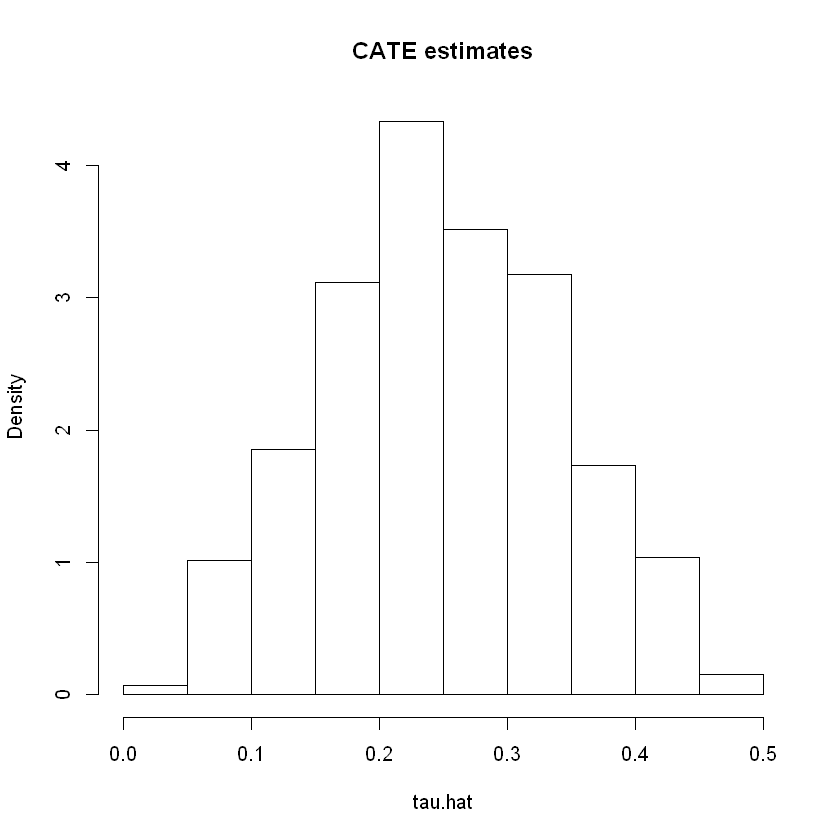

In [88]:
# Do not use this for assessing heterogeneity. See text above.
hist(tau.hat, main="CATE estimates", freq=F)

In [90]:
var_imp <- c(variable_importance(forest.tau))
names(var_imp) <- covariates
sorted_var_imp <- sort(var_imp, decreasing = TRUE)
print(sorted_var_imp)

                     age               postlaunch              gender_male 
              0.34725263               0.20106234               0.12757569 
              imd_decile          ethnicgrp_white            gender_female 
              0.09497790               0.06046560               0.04278849 
                     msm ethnicgrp_mixed_multiple                partners1 
              0.03730067               0.02957613               0.02358838 
         ethnicgrp_asian          ethnicgrp_black       gender_transgender 
              0.02344375               0.01196842               0.00000000 
         ethnicgrp_other 
              0.00000000 


In [91]:
var_imp <- c(variable_importance(forest.tau))

In [92]:
var_imp <- c(variable_importance(forest.tau))
names(var_imp) <- covariates
sorted_var_imp <- sort(var_imp, decreasing = TRUE)

In [93]:
sorted_var_imp

age               postlaunch              gender_male 
              0.34725263               0.20106234               0.12757569 
              imd_decile          ethnicgrp_white            gender_female 
              0.09497790               0.06046560               0.04278849 
                     msm ethnicgrp_mixed_multiple                partners1 
              0.03730067               0.02957613               0.02358838 
         ethnicgrp_asian          ethnicgrp_black       gender_transgender 
              0.02344375               0.01196842               0.00000000 
         ethnicgrp_other 
              0.00000000

In [94]:
# Valid randomized data and observational data with unconfoundedness+overlap.
# Note: read the comments below carefully. 
# In randomized settings, do not estimate forest.e and e.hat; use known assignment probs.

# Prepare dataset
fmla <- formula(paste0("~ 0 + ", paste0(covariates, collapse="+")))
X <- model.matrix(fmla, data)
W <- data[,treatment]
Y <- data[,outcome]

# Number of rankings that the predictions will be ranking on 
# (e.g., 2 for above/below median estimated CATE, 5 for estimated CATE quintiles, etc.)
num.rankings <- 5  

# Prepare for data.splitting
# Assign a fold number to each observation.
# The argument 'clusters' in the next step will mimick K-fold cross-fitting.
num.folds <- 10
folds <- sort(seq(n) %% num.folds) + 1

# Comment or uncomment depending on your setting.
# Observational setting with unconfoundedness+overlap (unknown assignment probs):
# forest <- causal_forest(X, Y, W, clusters = folds)
# Randomized settings with fixed and known probabilities (here: 0.5).
forest <- causal_forest(X, Y, W, W.hat=.5, clusters = folds)

# Retrieve out-of-bag predictions.
# Predictions for observation in fold k will be computed using 
# trees that were not trained using observations for that fold.
tau.hat <- predict(forest)$predictions

# Rank observations *within each fold* into quintiles according to their CATE predictions.
ranking <- rep(NA, n)
for (fold in seq(num.folds)) {
  tau.hat.quantiles <- quantile(tau.hat[folds == fold], probs = seq(0, 1, by=1/num.rankings))
  ranking[folds == fold] <- cut(tau.hat[folds == fold], tau.hat.quantiles, include.lowest=TRUE,labels=seq(num.rankings))
}

In [95]:
# Valid only in randomized settings.
# Average difference-in-means within each ranking

# Formula y ~ 0 + ranking + ranking:w
fmla <- paste0(outcome, " ~ 0 + ranking + ranking:", treatment)
ols.ate <- lm(fmla, data=transform(data, ranking=factor(ranking)))
ols.ate <- coeftest(ols.ate, vcov=vcovHC(ols.ate, type='HC2'))
interact <- which(grepl(":", rownames(ols.ate)))
ols.ate <- data.frame("ols", paste0("Q", seq(num.rankings)), ols.ate[interact, 1:2])
rownames(ols.ate) <- NULL # just for display
colnames(ols.ate) <- c("method", "ranking", "estimate", "std.err")
ols.ate

method,ranking,estimate,std.err
ols,Q1,0.1866998,0.04711210
ols,Q2,0.2731882,0.04544863
ols,Q3,0.2439033,0.04891376
ols,Q4,0.2399434,0.05044520
ols,Q5,0.3413003,0.05064892


In [96]:
# Computing AIPW scores.
tau.hat <- predict(forest)$predictions
e.hat <- forest$W.hat # P[W=1|X]
m.hat <- forest$Y.hat # E[Y|X]

# Estimating mu.hat(X, 1) and mu.hat(X, 0) for obs in held-out sample
# Note: to understand this, read equations 6-8 in this vignette:
# https://grf-labs.github.io/grf/articles/muhats.html
mu.hat.0 <- m.hat - e.hat * tau.hat        # E[Y|X,W=0] = E[Y|X] - e(X)*tau(X)
mu.hat.1 <- m.hat + (1 - e.hat) * tau.hat  # E[Y|X,W=1] = E[Y|X] + (1 - e(X))*tau(X)

# AIPW scores
aipw.scores <- tau.hat + W / e.hat * (Y -  mu.hat.1) - (1 - W) / (1 - e.hat) * (Y -  mu.hat.0)

ols <- lm(aipw.scores ~ 0 + factor(ranking))
forest.ate <- data.frame("aipw", paste0("Q", seq(num.rankings)), coeftest(ols, vcov=vcovHC(ols, "HC2"))[,1:2])
colnames(forest.ate) <- c("method", "ranking", "estimate", "std.err")
rownames(forest.ate) <- NULL # just for display
forest.ate

method,ranking,estimate,std.err
aipw,Q1,0.1848292,0.04705391
aipw,Q2,0.2621798,0.04501666
aipw,Q3,0.2459015,0.04867426
aipw,Q4,0.2090515,0.05029579
aipw,Q5,0.3323936,0.05100606


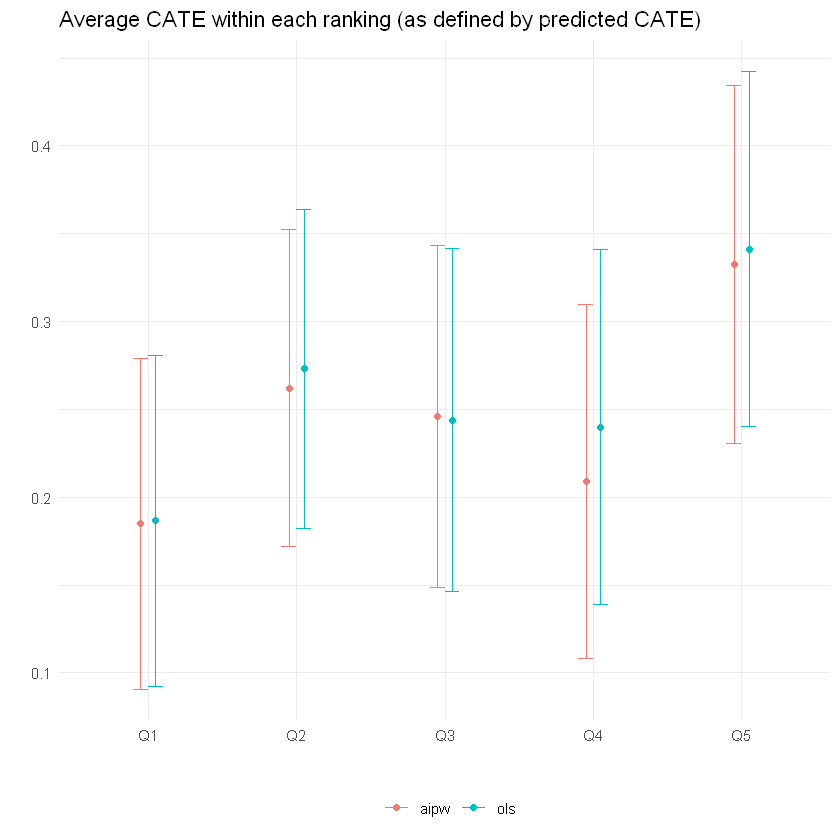

In [97]:
# Concatenate the two results.
res <- rbind(forest.ate, ols.ate)

# Plotting the point estimate of average treatment effect 
# and 95% confidence intervals around it.
ggplot(res) +
  aes(x = ranking, y = estimate, group=method, color=method) + 
  geom_point(position=position_dodge(0.2)) +
  geom_errorbar(aes(ymin=estimate-2*std.err, ymax=estimate+2*std.err), width=.2, position=position_dodge(0.2)) +
  ylab("") + xlab("") +
  ggtitle("Average CATE within each ranking (as defined by predicted CATE)") +
  theme_minimal() +
  theme(legend.position="bottom", legend.title = element_blank())

In [101]:
romano_wolf_correction <- function(t.orig, t.boot) {
  abs.t.orig <- abs(t.orig)
  abs.t.boot <- abs(t.boot)
  abs.t.sorted <- sort(abs.t.orig, decreasing = TRUE)

  max.order <- order(abs.t.orig, decreasing = TRUE)
  rev.order <- order(max.order)

  M <- nrow(t.boot)
  S <- ncol(t.boot)

  p.adj <- rep(0, S)
  p.adj[1] <- mean(apply(abs.t.boot, 1, max) > abs.t.sorted[1])
  for (s in seq(2, S)) {
    cur.index <- max.order[s:S]
    p.init <- mean(apply(abs.t.boot[, cur.index, drop=FALSE], 1, max) > abs.t.sorted[s])
    p.adj[s] <- max(p.init, p.adj[s-1])
  }
  p.adj[rev.order]
}

summary_rw_lm <- function(model, indices=NULL, cov.type="HC2", num.boot=10000) {

  if (is.null(indices)) {
    indices <- 1:nrow(coef(summary(model)))
  }
  # Grab the original t values.
  summary <- coef(summary(model))[indices,,drop=FALSE]
  t.orig <- summary[, "t value"]

  # Null resampling.
  # This is a trick to speed up bootstrapping linear models.
  # Here, we don't really need to re-fit linear regressions, which would be a bit slow.
  # We know that betahat ~ N(beta, Sigma), and we have an estimate Sigmahat.
  # So we can approximate "null t-values" by
  #  - Draw beta.boot ~ N(0, Sigma-hat) --- note the 0 here, this is what makes it a *null* t-value.
  #  - Compute t.boot = beta.boot / sqrt(diag(Sigma.hat))
  Sigma.hat <- vcovHC(model, type=cov.type)[indices, indices]
  se.orig <- sqrt(diag(Sigma.hat))
  num.coef <- length(se.orig)
  beta.boot <- mvrnorm(n=num.boot, mu=rep(0, num.coef), Sigma=Sigma.hat)
  t.boot <- sweep(beta.boot, 2, se.orig, "/")
  p.adj <- romano_wolf_correction(t.orig, t.boot)

  result <- cbind(summary[,c(1,2,4),drop=F], p.adj)
  colnames(result) <- c('Estimate', 'Std. Error', 'Orig. p-value', 'Adj. p-value')
  result
}

# Valid in randomized settings only.

# y ~ ranking + w + ranking:w
fmla <- paste0(outcome, "~ ranking + ", treatment, " + ranking:", treatment) 
ols <- lm(fmla, data=transform(data, ranking=factor(ranking)))
interact <- which(sapply(names(coef(ols)), function(x) grepl(":", x)))
res <- summary_rw_lm(ols, indices=interact)
rownames(res) <- paste("Rank", 2:num.rankings, "- Rank 1") # just for display
res

,Estimate,Std. Error,Orig. p-value,Adj. p-value
Rank 2 - Rank 1,0.08648841,0.06860484,0.2075961,0.4486
Rank 3 - Rank 1,0.05720351,0.06903945,0.4074663,0.6225
Rank 4 - Rank 1,0.05324364,0.06902913,0.4406219,0.6225
Rank 5 - Rank 1,0.15460049,0.06909074,0.0253712,0.0818


Saving 6.67 x 6.67 in image


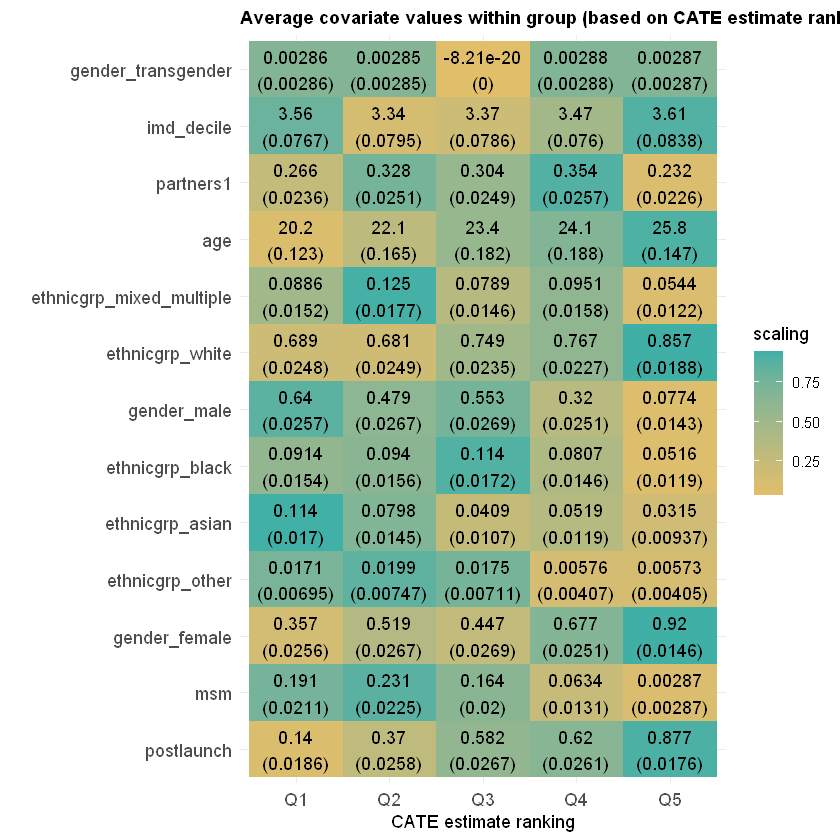

In [107]:
df <- mapply(function(covariate) {
      # Looping over covariate names
      # Compute average covariate value per ranking (with correct standard errors)
      fmla <- formula(paste0(covariate, "~ 0 + ranking"))
      ols <- lm(fmla, data=transform(data, ranking=factor(ranking)))
      ols.res <- coeftest(ols, vcov=vcovHC(ols, "HC2"))
    
      # Retrieve results
      avg <- ols.res[,1]
      stderr <- ols.res[,2]
      
      # Tally up results
      data.frame(covariate, avg, stderr, ranking=paste0("Q", seq(num.rankings)), 
                 # Used for coloring
                 scaling=pnorm((avg - mean(avg))/sd(avg)), 
                 # We will order based on how much variation is 'explain' by the averages
                 # relative to the total variation of the covariate in the data
                 variation=sd(avg) / sd(data[,covariate]),
                 # String to print in each cell in heatmap below
                 labels=paste0(signif(avg, 3), "\n", "(", signif(stderr, 3), ")"))
}, covariates, SIMPLIFY = FALSE)

df <- do.call(rbind, df)

# a small optional trick to ensure heatmap will be in decreasing order of 'variation'
df$covariate <- reorder(df$covariate, order(df$variation))

# plot heatmap
grph=ggplot(df) +
    aes(ranking, covariate) +
    geom_tile(aes(fill = scaling)) + 
    geom_text(aes(label = labels)) +
    scale_fill_gradient(low = "#E1BE6A", high = "#40B0A6") +
    ggtitle(paste0("Average covariate values within group (based on CATE estimate ranking)")) +
    theme_minimal() + 
    ylab("") + xlab("CATE estimate ranking") +
    theme(plot.title = element_text(size = 11, face = "bold"),
          axis.text=element_text(size=11)) 
print(grph)
ggsave(filename = "grafico.png")

In [108]:
tabla=best_linear_projection(forest.tau, X)
print(tabla)


Best linear projection of the conditional average treatment effect.
Confidence intervals are cluster- and heteroskedasticity-robust (HC3):

                           Estimate Std. Error t value  Pr(>|t|)    
(Intercept)               0.7255804  0.3077853  2.3574 0.0185133 *  
gender_female            -0.8069039  0.2740533 -2.9443 0.0032798 ** 
gender_male              -0.9469215  0.2751514 -3.4415 0.0005924 ***
ethnicgrp_asian          -0.1528768  0.0865959 -1.7654 0.0776725 .  
ethnicgrp_black          -0.0487450  0.0768681 -0.6341 0.5260747    
ethnicgrp_mixed_multiple -0.1393021  0.0743493 -1.8736 0.0611521 .  
ethnicgrp_other           0.0887715  0.2042912  0.4345 0.6639548    
partners1                 0.0103903  0.0473848  0.2193 0.8264620    
postlaunch                0.1379476  0.0451743  3.0537 0.0022951 ** 
msm                      -0.0307736  0.0753531 -0.4084 0.6830363    
age                       0.0132308  0.0063091  2.0971 0.0361293 *  
imd_decile                0.009

# Double Lasso

In [111]:
data=read.csv("C:/Users/user/Documents/GitHub/Causal-Inference-Proyect-e---STI/DATA/processed_esti.csv")
data = data[data$gender_transgender != 1, ]

#-----------------------------#
#---Double Lasso  y ~ w-------#
#-----------------------------#
w = as.matrix(data[2])
X = as.matrix(data[3:dim(data)[2]])
y = as.matrix(data[1])

lasso_y <- cv.glmnet(X, y, alpha = 1)
lasso_w <- cv.glmnet(X, w, alpha = 1)


pred_y = predict(lasso_y, s = lasso_y$lambda.min, newx = X, type = "response")
pred_w = predict(lasso_y, s = lasso_y$lambda.min, newx = X, type = "response")
res_y = y - pred_y
res_w = w - pred_w

ols_model1 <- lm(res_y ~ res_w)
summary(ols_model1)

#Heterogeneity
data$int = data$w * data$gender_male
b = as.matrix(data[16])
X = as.matrix(data[2:15])
y = as.matrix(data[1])

lasso_y <- cv.glmnet(X, y, alpha = 1)
lasso_b <- cv.glmnet(X, w, alpha = 1)


pred_y = predict(lasso_y, s = lasso_y$lambda.min, newx = X, type = "response")
pred_b = predict(lasso_y, s = lasso_y$lambda.min, newx = X, type = "response")
res_y = y - pred_y
res_b = b - pred_b

ols_model2 <- lm(res_y ~ res_b)
summary(ols_model2)


Call:
lm(formula = res_y ~ res_w)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.5951 -0.3774 -0.2028  0.4969  0.9392 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.04395    0.01150  -3.821 0.000138 ***
res_w        0.24675    0.02164  11.404  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4514 on 1733 degrees of freedom
Multiple R-squared:  0.06981,	Adjusted R-squared:  0.06927 
F-statistic: 130.1 on 1 and 1733 DF,  p-value: < 2.2e-16



Call:
lm(formula = res_y ~ res_b)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.6889 -0.3427 -0.2020  0.4685  1.0337 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) -0.008485   0.011378  -0.746   0.4559  
res_b       -0.063458   0.027084  -2.343   0.0192 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4493 on 1733 degrees of freedom
Multiple R-squared:  0.003158,	Adjusted R-squared:  0.002582 
F-statistic:  5.49 on 1 and 1733 DF,  p-value: 0.01924


In [112]:
#---Export---#
#------------#
model_summary = summary(ols_model1)
coefficients = model_summary$coefficients
coeff_df = as.data.frame(coefficients)
print(coeff_df)
csv_file = "ate_doublelasso.csv"
write.csv(coeff_df, file = csv_file, row.names = TRUE)

model_summary = summary(ols_model2)
coefficients = model_summary$coefficients
coeff_df = as.data.frame(coefficients)
print(coeff_df)
csv_file = "het_doublelasso.csv"
write.csv(coeff_df, file = csv_file, row.names = TRUE)

              Estimate Std. Error   t value     Pr(>|t|)
(Intercept) -0.0439455 0.01150078 -3.821088 1.375532e-04
res_w        0.2467490 0.02163636 11.404368 4.214245e-29
                Estimate Std. Error   t value   Pr(>|t|)
(Intercept) -0.008485461 0.01137769 -0.745798 0.45589057
res_b       -0.063458078 0.02708427 -2.342987 0.01924265
